In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/tirthajyoti/Machine-Learning-with-Python/master/Datasets/Mall_Customers.csv')

In [5]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df.shape

(200, 5)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [7]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [8]:
# label encoder

from sklearn.preprocessing import LabelEncoder
enc=LabelEncoder()
df.Gender = enc.fit_transform(df.Gender)
df

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40
...,...,...,...,...
195,0,35,120,79
196,0,45,126,28
197,1,32,126,74
198,1,32,137,18


In [7]:
df.drop('CustomerID',axis=1,inplace=True)

In [9]:
lst=[]
for i in range(1,11):
    kmodel = KMeans(n_clusters=i)
    kmodel.fit(df)
    lst.append(kmodel.inertia_)

C:\Users\anshlife1\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\anshlife1\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\anshlife1\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\anshlife1\AppData\Roaming\Python\Python39\site-packages\sklea

In [10]:
lst

[308862.06,
 212889.442455243,
 143391.59236035674,
 104414.67534220166,
 75399.61541401484,
 58350.65449462818,
 51132.70321257689,
 44391.820804870804,
 41395.484656593406,
 38300.79350522772]

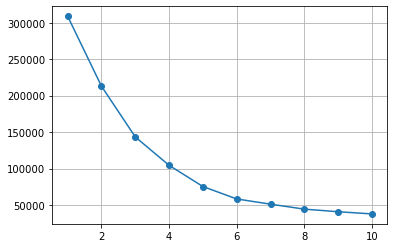

In [13]:
plt.plot(range(1,11),lst,marker='o')
plt.grid()

In [20]:
kmodel=KMeans(n_clusters=5)
kmodel.fit(df)

C:\Users\anshlife1\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=5)

In [21]:
prediction = kmodel.predict(df)
kmodel.cluster_centers_

array([[ 0.52777778, 40.66666667, 87.75      , 17.58333333,  4.97222222],
       [ 0.39130435, 25.52173913, 26.30434783, 78.56521739,  2.13043478],
       [ 0.46153846, 32.69230769, 86.53846154, 82.12820513,  2.25641026],
       [ 0.39130435, 45.2173913 , 26.30434783, 20.91304348,  6.04347826],
       [ 0.41772152, 43.08860759, 55.29113924, 49.56962025,  3.89873418]])

In [14]:
prediction

array([3, 2, 9, 2, 3, 2, 9, 2, 9, 2, 9, 2, 9, 2, 9, 2, 3, 2, 3, 2, 3, 2,
       9, 2, 9, 2, 3, 2, 3, 2, 9, 2, 9, 2, 9, 2, 9, 2, 3, 2, 1, 2, 3, 5,
       3, 2, 1, 5, 3, 3, 1, 5, 5, 1, 1, 3, 1, 1, 5, 1, 1, 5, 1, 1, 1, 5,
       6, 1, 5, 5, 1, 6, 1, 1, 1, 5, 6, 6, 5, 6, 1, 6, 1, 6, 5, 6, 1, 5,
       5, 6, 1, 5, 6, 6, 5, 5, 6, 5, 6, 5, 5, 6, 1, 5, 6, 5, 1, 6, 1, 1,
       1, 5, 6, 5, 5, 5, 1, 6, 6, 6, 5, 6, 6, 0, 4, 0, 6, 0, 4, 0, 4, 0,
       5, 0, 4, 0, 4, 0, 4, 0, 4, 0, 5, 0, 4, 0, 6, 0, 4, 0, 4, 0, 4, 0,
       4, 0, 4, 0, 4, 0, 6, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0,
       4, 0, 4, 8, 7, 8, 7, 8, 7, 8, 7, 8, 7, 8, 7, 8, 7, 8, 7, 8, 7, 8,
       7, 8])

In [22]:
df['cluster'] = prediction
df

,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster
0,1,19,15,39,3
1,1,21,15,81,1
2,0,20,16,6,3
3,0,23,16,77,1
4,0,31,17,40,3
...,...,...,...,...,...
195,0,35,120,79,2
196,0,45,126,28,0
197,1,32,126,74,2
198,1,32,137,18,0


(0.0, 100.0)

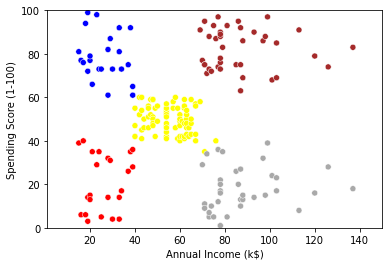

In [24]:
from scipy.spatial import ConvexHull
color=np.array(['darkgray','blue','brown','red','yellow'])
sns.scatterplot(x=df['Annual Income (k$)'],y=df['Spending Score (1-100)'],c=color[kmodel.labels_])
plt.xlim(1,150)
plt.ylim(0,100)

In [29]:
kmodel.labels_

array([3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 2, 0, 2, 4, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 4, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2])

{'icoord': [[15.0, 15.0, 25.0, 25.0],
  [45.0, 45.0, 55.0, 55.0],
  [65.0, 65.0, 75.0, 75.0],
  [105.0, 105.0, 115.0, 115.0],
  [135.0, 135.0, 145.0, 145.0],
  [125.0, 125.0, 140.0, 140.0],
  [185.0, 185.0, 195.0, 195.0],
  [235.0, 235.0, 245.0, 245.0],
  [285.0, 285.0, 295.0, 295.0],
  [315.0, 315.0, 325.0, 325.0],
  [305.0, 305.0, 320.0, 320.0],
  [290.0, 290.0, 312.5, 312.5],
  [275.0, 275.0, 301.25, 301.25],
  [265.0, 265.0, 288.125, 288.125],
  [255.0, 255.0, 276.5625, 276.5625],
  [240.0, 240.0, 265.78125, 265.78125],
  [335.0, 335.0, 345.0, 345.0],
  [405.0, 405.0, 415.0, 415.0],
  [395.0, 395.0, 410.0, 410.0],
  [385.0, 385.0, 402.5, 402.5],
  [375.0, 375.0, 393.75, 393.75],
  [365.0, 365.0, 384.375, 384.375],
  [355.0, 355.0, 374.6875, 374.6875],
  [340.0, 340.0, 364.84375, 364.84375],
  [252.890625, 252.890625, 352.421875, 352.421875],
  [225.0, 225.0, 302.65625, 302.65625],
  [215.0, 215.0, 263.828125, 263.828125],
  [205.0, 205.0, 239.4140625, 239.4140625],
  [190.0, 190.0,

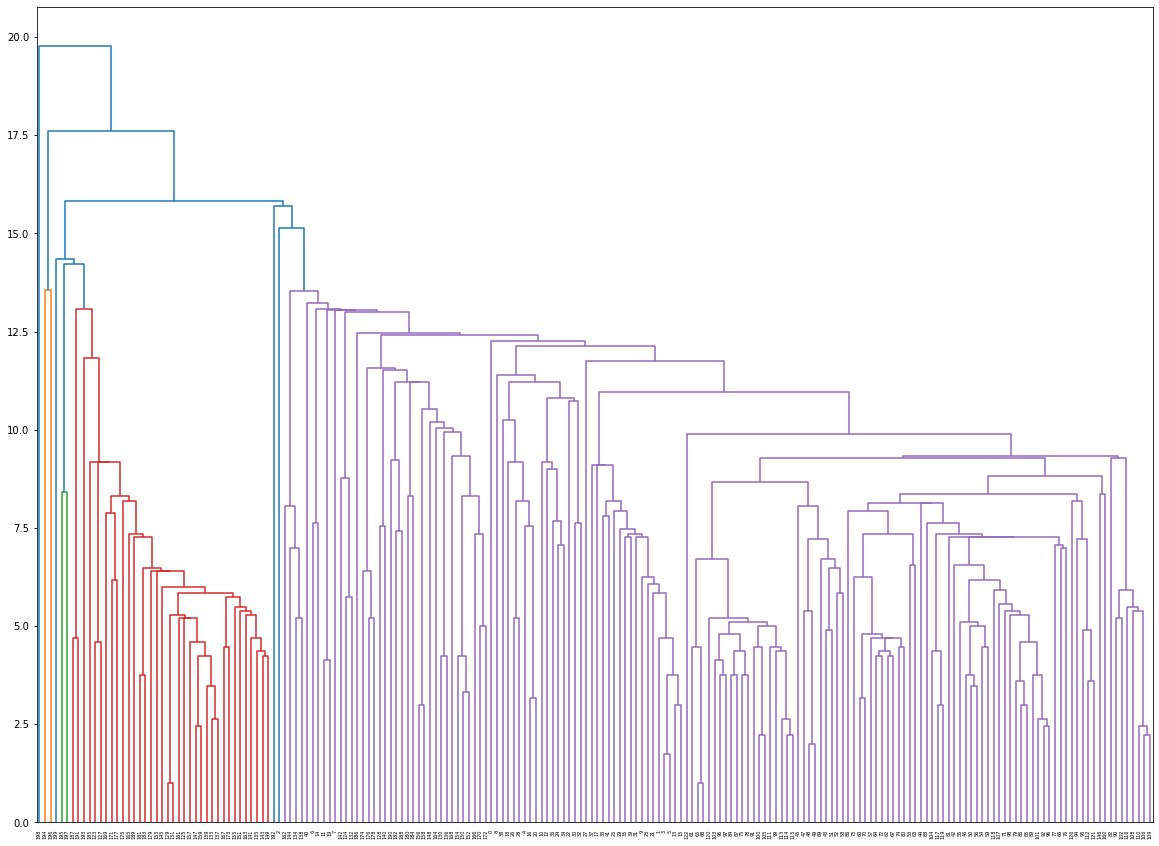

In [27]:
from scipy.cluster.hierarchy import linkage, dendrogram
var = linkage(df)
plt.figure(figsize=(20,15))
dendrogram(var)

In [30]:
lst = [10,20,30,40,50,60]
output = [30,50,70,90,110]


lst = ['hello','wonderland','superb', 'awesome']
lst1 = ['lo','nderland','erb','esome']